# Non Linear Regression Example with Keras and Tensorflow Backend

The data for fitting was generated using a non linear continuous function. It has five inputs and one output. Both the training set and validation set have aorund 1000 datapoints. 

### Y = SIN(A) x EXP(B) + COS(C x C) + POWER(D,5) - TANH(E)


Created: December 2016
Last Modified: 05-Jan-2017
Shankar Ananth Asokan

In [24]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy
%matplotlib inline

#Red data from csv file for training and validation data
TrainingSet = numpy.genfromtxt("training.csv", delimiter=",", skip_header=True)
ValidationSet = numpy.genfromtxt("validation.csv", delimiter=",", skip_header=True)

# split into input (X) and output (Y) variables
X1 = TrainingSet[:,0:5]
Y1 = TrainingSet[:,5]

X2 = ValidationSet[:,0:5]
Y2 = ValidationSet[:,5]

# create model
model = Sequential()
model.add(Dense(20, input_dim=5, init='uniform', activation='tanh'))
model.add(Dense(1, init='uniform', activation='linear'))

# Compile model
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X1, Y1, nb_epoch=5000, batch_size=10,  verbose=2)

# Calculate predictions
PredTestSet = model.predict(X1)
PredValSet = model.predict(X2)

# Save predictions
numpy.savetxt("trainresults.csv", PredTestSet, delimiter=",")
numpy.savetxt("valresults.csv", PredValSet, delimiter=",")


Epoch 1/5000
0s - loss: 1.6192 - acc: 0.0000e+00
Epoch 2/5000
0s - loss: 0.3319 - acc: 0.0000e+00
Epoch 3/5000
0s - loss: 0.2576 - acc: 0.0000e+00
Epoch 4/5000
0s - loss: 0.1954 - acc: 0.0000e+00
Epoch 5/5000
0s - loss: 0.1350 - acc: 0.0000e+00
Epoch 6/5000
0s - loss: 0.0869 - acc: 0.0000e+00
Epoch 7/5000
0s - loss: 0.0602 - acc: 0.0000e+00
Epoch 8/5000
0s - loss: 0.0510 - acc: 0.0000e+00
Epoch 9/5000
0s - loss: 0.0486 - acc: 0.0000e+00
Epoch 10/5000
0s - loss: 0.0489 - acc: 0.0000e+00
Epoch 11/5000
0s - loss: 0.0485 - acc: 0.0000e+00
Epoch 12/5000
0s - loss: 0.0479 - acc: 0.0000e+00
Epoch 13/5000
0s - loss: 0.0480 - acc: 0.0000e+00
Epoch 14/5000
0s - loss: 0.0479 - acc: 0.0000e+00
Epoch 15/5000
0s - loss: 0.0477 - acc: 0.0000e+00
Epoch 16/5000
0s - loss: 0.0478 - acc: 0.0000e+00
Epoch 17/5000
0s - loss: 0.0481 - acc: 0.0000e+00
Epoch 18/5000
0s - loss: 0.0479 - acc: 0.0000e+00
Epoch 19/5000
0s - loss: 0.0481 - acc: 0.0000e+00
Epoch 20/5000
0s - loss: 0.0484 - acc: 0.0000e+00
Epoch 21/

Training Set R-Square= 0.999838558902


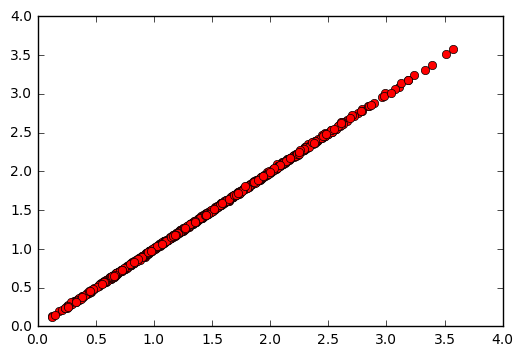

In [25]:
#Plot actual vs predition for training set
TestResults = numpy.genfromtxt("trainresults.csv", delimiter=",")
plt.plot(Y1,TestResults,'ro')

#Compute R-Square value for training set
TestR2Value = r2_score(Y1,TestResults)
print("Training Set R-Square=", TestR2Value)

Validation Set R-Square= 0.999826897535


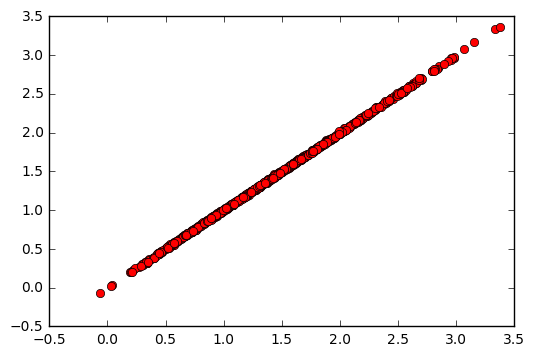

In [26]:
#Plot actual vs predition for validation set
ValResults = numpy.genfromtxt("valresults.csv", delimiter=",")
plt.plot(Y2,ValResults,'ro')

#Compute R-Square value for validation set
ValR2Value = r2_score(Y2,ValResults)
print("Validation Set R-Square=",ValR2Value)

### ------------------------------End of Code------------------------------